0.44605905843961724


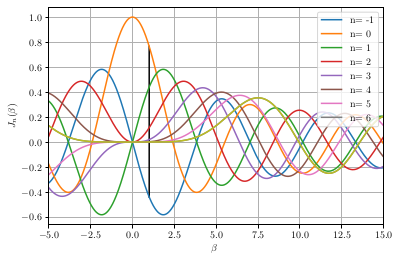

In [36]:
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import scipy.special as sc
import scipy.fftpack

import matplotlib
# Use the pgf backend (must be set before pyplot imported)
matplotlib.use("pgf")
import matplotlib.pyplot as plt
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

plt.plot([1,1],[sc.jv(0,1),sc.jv(-1,1)],color = 'black')
for n in range (-1,7):
    x = np.linspace(-6,16,5000)
    y = sc.jv(n,x)
    plt.plot(x, y, '-',label='n= '+str(n))

plt.xlim(-5,15)
plt.grid(True)
plt.ylabel('$J_n(\\beta)$')
plt.xlabel(' $ \\beta $ ')
plt.plot(x, y)
plt.legend(loc ='upper right')
#plt.show()
plt.savefig('bessel.pgf', format='pgf')
print(sc.jv(2,2.5))

In [ ]:

def fm(beta,fc = 100.0, fm = 20.0):
    # Number of samplepoints
    N = 10000
    # smple spacing
    T = 1.01 / 10000.0
    x = np.linspace(0.01, N*T, N)

    y_old = np.sin(fc * 2.0*np.pi*x+beta*np.sin(fm * 2.0*np.pi*x))
    y = 0*x
    xf = fftfreq(N, 1 / N)
    for k in range (-6, -1):
        y = sc.jv(k,beta)*np.sin((fc+k*fm) * 2.0*np.pi*x)
        yf = fft(y)*2/N
        plt.plot(xf, np.abs(yf),color ='black')
    for k in range (-1, 7):
        y = sc.jv(k,beta)*np.sin((fc+k*fm) * 2.0*np.pi*x)
        yf = fft(y)*2/N
        plt.plot(xf, np.abs(yf), label='n= '+str(k))
        #print(np.max(np.abs(yf)))
    # Controll section calculate the same but without Bessel
    #ytest = np.sin((fc*2.0*np.pi*x+beta*np.sin(2.0*np.pi*fm*x)))
    #yftest = fft(ytest)/(1.25*fc*2*np.pi**2)
    #print(np.max(np.abs(yftest)))#at beta <1 schould be the same as Bessel_0
    #print(sc.jv(0,beta)) # 

    #plt.plot(xf, np.abs(yftest),color ='green')

    #plt.plot(xf, np.broadcast_to(sc.jv(0,beta), xf.shape))
    plt.ylabel('$x_c$')
    plt.xlabel('Frequency')
    plt.legend(loc ='upper right')
    plt.xlim(-210, 210)
    plt.ylim(-0.02, 1)
    plt.yticks([n*0.1 for n in range(11)])

    


In [ ]:
plt.cla()
plt.clf()
fm(1) 
plt.savefig('normal.pgf', format='pgf')
plt.cla()
plt.clf()
fm(2)
plt.savefig('beta_2.pgf', format='pgf')
plt.cla()
plt.clf()
fm(1, fc= 100.0,fm = 10)
plt.savefig('fm_10.pgf', format='pgf')
plt.cla()
plt.clf()
fm(1, fc = 150)
plt.savefig('fc_150.pgf', format='pgf')


Nat Modulationsarten

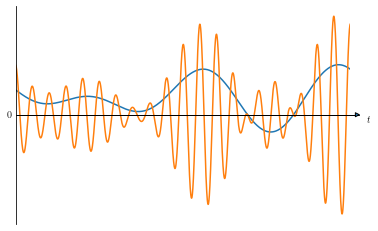

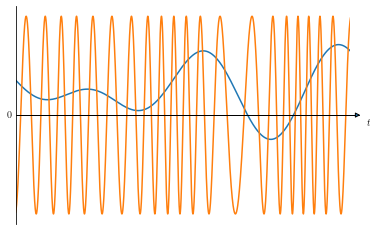

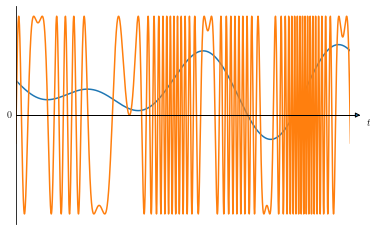

In [30]:
t = np.linspace(-1.2,1.2,500000)

# m(t)
k = 0.25
dc = 0.25
f1 = 1
f2 = 1.4

# x_c(t)
fc = 10
kp = 1.5 * 2 * np.pi
kf = 15

m = dc + k* np.cos(2*np.pi*f1*t) + k*np.sin(2*np.pi*f2*t)

AM = 2* m* np.cos(2* np.pi *fc*t)

PM = 1* np.cos(2* np.pi * fc*t+kp*m)

dt= t[1]-t[0]
phi = kp * m + np.gradient(PM,dt)


phidt =  np.append(0, kf*2*np.pi*m[:-1]) #? Correct?
FM = 1* (np.cos(2 *np.pi *fc *t + phidt))

def preplot():   
    from mpl_toolkits.axisartist.axislines import AxesZero

    fig = plt.figure()
    ax = fig.add_subplot(axes_class=AxesZero)
    ax.axis["xzero"].set_axisline_style("-|>")
    # adds X and Y-axis from the origin
    ax.axis["xzero"].set_visible(True)
    ax.axis["right", "bottom", "top"].set_visible(False)
    ax.set_yticks([0])
    ax.set_xticks([])
    plt.text(1.1, -0.1,'$t$')
    plt.xlim(-1)
    plt.plot(t, m, '-')
    

preplot()
plt.plot(t, AM,'-')
plt.savefig('AM.pgf', format='pgf')
preplot()
plt.plot(t,PM, '-')
plt.savefig('PM.pgf', format='pgf')
preplot()
plt.plot(t,FM, '-')
plt.savefig('FM.pgf', format='pgf')
plt.show()

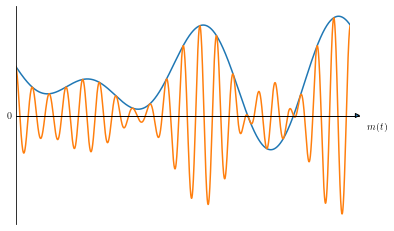

In [32]:

from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure()
ax = fig.add_subplot(axes_class=AxesZero)
ax.axis["xzero"].set_axisline_style("-|>")
# adds X and Y-axis from the origin
ax.axis["xzero"].set_visible(True)
ax.axis["right", "bottom", "top"].set_visible(False)
ax.set_yticks([0])
ax.set_xticks([])
plt.text(1.1, -0.1,'$m(t)$')
plt.xlim(-1)
plt.plot(t, m, '-')
plt.plot(t, AM/2,'-')

plt.savefig('AM_normal.pgf', format='pgf')


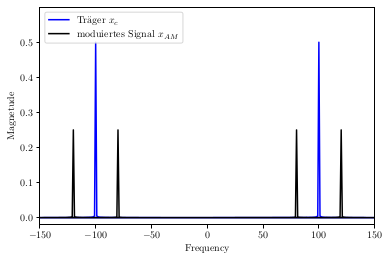

In [37]:
# Number of samplepoints
N = 10000
# smple spacing
T = 1.01 / 10000.0
x = np.linspace(0.01, N*T, N)

fc = 100.0
fm = 20.0
m = np.cos(fm * 2.0*np.pi*x)
xc = np.cos(fc * 2.0*np.pi*x)
yAM = m*xc
xf = fftfreq(N, 1 / N)
yf = fft(yAM)/N
xcf = fft(xc)/N
plt.plot(xf, np.abs(xcf),color ='blue',label = 'Träger $x_c$')
plt.plot(xf, np.abs(yf),color ='black',label = 'moduiertes Signal $x_{AM}$')
plt.ylabel('Magnetude')
plt.xlabel('Frequency')
plt.legend(loc ='upper left')
plt.xlim(-150, 150)
plt.ylim(-0.02, 0.6)
plt.yticks([n*0.1 for n in range(6)])
plt.savefig('AM_frequency.pgf', format='pgf')